<a href="https://colab.research.google.com/github/Nekoiii/ML_Practices_colab/blob/main/launch_sd_with_lora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://qiita.com/nR9h3kLy/items/a2d2be4c48f253a8e331
https://qiita.com/Limitex/items/275d91dd4acdbf57b5f4


StableDiffusionPipeline详细原理解说：https://happy-shibusawake.com/sd-pipeline_txt2img/948/

In [ ]:
!git clone https://github.com/cloneofsimo/lora.git
!pip install accelerate==0.19.0 bitsandbytes
%cd lora
!pip install .
!pip install -r requirements.txt

In [ ]:
%%script false --no-raise-error
!git clone https://github.com/huggingface/diffusers.git -b v0.14.0
%cd diffusers
!pip install .
%cd ../

In [ ]:
%%script false --no-raise-error
!git clone https://github.com/huggingface/transformers -b v4.30.0
%cd transformers
!pip install .
%cd ../

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, UniPCMultistepScheduler

# .to('cuda'): use gpu，.to(‘cpu’): use cpu
pipe = StableDiffusionPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5",
        torch_dtype=torch.float16,
    ).to('cuda')

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

In [4]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

  0%|          | 0/50 [00:00<?, ?it/s]

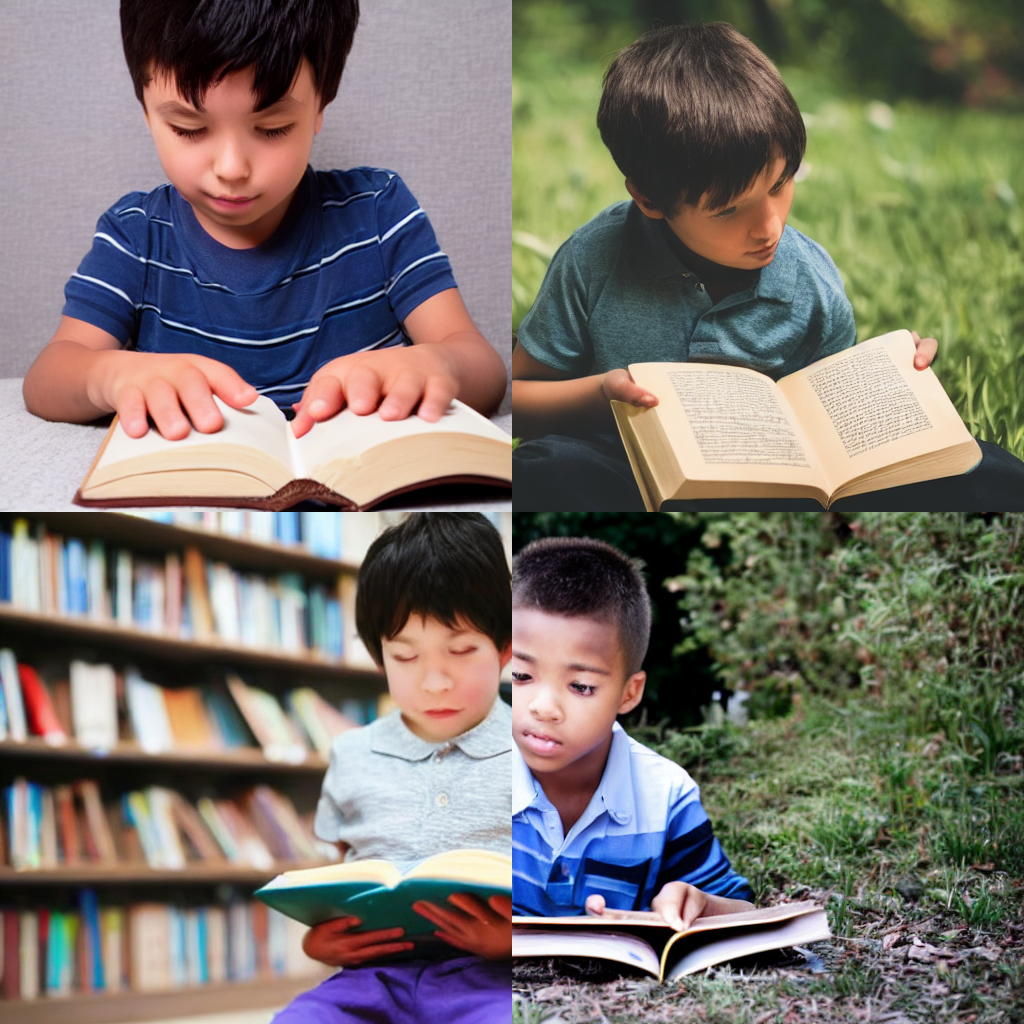

In [5]:
generator = [torch.Generator(device="cuda").manual_seed(i+1) for i in range(4)]

images = pipe(prompt=" a boy hoding a book",
              negative_prompt="",
              generator=generator,
              num_inference_steps=20,
              height=512,
              width=512,
              num_images_per_prompt=4,
              guidance_scale=7.0).images

image_grid(images, 2, 2)